# **Modélisation du phénomène de churn d'une banque**

# **INTRODUCTION**

## **Dans cette étude nous allons travailler sur un problème de classification dans lequel nous avons un ensemble de données dans lequel se trouvent les détails des clients d'une banque et la variable cible est une variable binaire reflétant le fait que le client ait quitté la banque (fermé son compte) ou il continue d'être client.**
---







# **L'ensemble de données a l'attribut suivant:**

Rownumber: Unique ID for every row

CustomerID: Unique ID for every client

Surname: Client's surname

CreditScore: Client's credit score

Geography: Country of client's origin

Gender: Client's gender

Age: Client's age

Tenure: Number of years for which the client has been with the bank

Balance: Client's balance on account

NumOfProducts: Number of client's products

HasCrCard: Flag whether client has credit card or not

IsActiveMember: Flag whether client is active member of bank or not

EstimatedSalary: Client's annual estimated salary in euros

Exited: Target variable, flag, whether client left the bank or not

In [ ]:
import pandas as pd
#from google.colab import drive
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

chemin_fichier = '/content/drive/MyDrive/Churn_Modelling.csv'
#chemin_fichier_soule='C:/Users/soule/Desktop/master ecap/Master 2/SVM/dossier_DL/Churn_Modelling.csv'
churn_base = pd.read_csv(chemin_fichier, sep=",", index_col="RowNumber")
churn_base.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **Le dataset contient 13 variables dont 10 en tant que variables explicatives et la variable Exited est notre variable à modéliser. La base de donnée étant constituée de variables qualitative et quantitative, elle présente donc une énorme différence d'échelle. Les variables customerID et surname ne seront pas utiliser dans la modélisation car elles n'apportent aucunne information prédictive.**

In [ ]:
churn_data=churn_base.copy()
variable=['CustomerId','Surname']
churn_data=churn_data.drop(variable, axis=1)
churn_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


## **Cette commande nous permet de voir le type des variables dans notre base de donnée. On remarque qu'il y' a certaines variables qui ne sont pas au bon format par conséquent, nous allons  les mettre au bon format.**

In [ ]:
## remise des variables au bon format
churn_data['HasCrCard'] = churn_data['HasCrCard'].astype(str)
churn_data['Exited'] = churn_data['Exited'].astype(str)
churn_data['NumOfProducts'] = churn_data['NumOfProducts'].astype(str)
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].astype(str)
churn_data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts       object
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited              object
dtype: object

####check if there ar na in a dataset
churn_data.isna().sum

In [ ]:
churn_data.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of            CreditScore  Geography  Gender    Age  Tenure  Balance  \
RowNumber                                                           
1                False      False   False  False   False    False   
2                False      False   False  False   False    False   
3                False      False   False  False   False    False   
4                False      False   False  False   False    False   
5                False      False   False  False   False    False   
...                ...        ...     ...    ...     ...      ...   
9996             False      False   False  False   False    False   
9997             False      False   False  False   False    False   
9998             False      False   False  False   False    False   
9999             False      False   False  False   False    False   
10000            False      False   False  False   False    False   

           NumOfProducts  HasCrCard  IsA

 # **On remarque que dans notre base de donnée on a pas de valeur manquante.**

In [ ]:
churn_data.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


## **Pour les variables quantitatives continues telle que le score credit du client,  la balance compte du client  et le salaire annuel du client présentent un écart-type très élévé ce qui indique la variabilité de ces dernières. Aussi, avec des moyenne très différentes, nous devons normalisé ces données pour éliminer l'éffet d'échelle lors de la prédiction.**

In [ ]:
col_int = churn_data.select_dtypes(include=['int64','float64']).columns

col_int

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'], dtype='object')

In [ ]:
churn_data[col_int].nunique()

CreditScore         460
Age                  70
Tenure               11
Balance            6382
EstimatedSalary    9999
dtype: int64

In [ ]:
from scipy import stats

In [ ]:
# On crée un tableau pour stocker les résultats
resultats_tests = pd.DataFrame(columns=['Variable', 'Statistique de test', 'p-value', 'Suit loi normale (5%)'])

# Boucle pour effectuer le shapiro test sur chaque variable:
for colonne in col_int:
    # Effectuez le test de normalité de Shapiro-Wilk
    statistique, p_value = stats.shapiro(churn_data[colonne])

    # Ajoutez les résultats au tableau
    suit_loi_normale = 'Oui' if p_value > 0.05 else 'Non'
    resultats_tests = resultats_tests.append({
        'Variable': colonne,
        'Statistique de test': statistique,
        'p-value': p_value,
        'Suit loi normale (5%)': suit_loi_normale
    }, ignore_index=True)

# Affichez le tableau des résultats
resultats_tests

,Variable,Statistique de test,p-value,Suit loi normale (5%)
0,CreditScore,0.993926,3.532838e-20,Non
1,Age,0.944137,0.000000e+00,Non
2,Tenure,0.948621,0.000000e+00,Non
3,Balance,0.845580,0.000000e+00,Non
4,EstimatedSalary,0.956637,0.000000e+00,Non


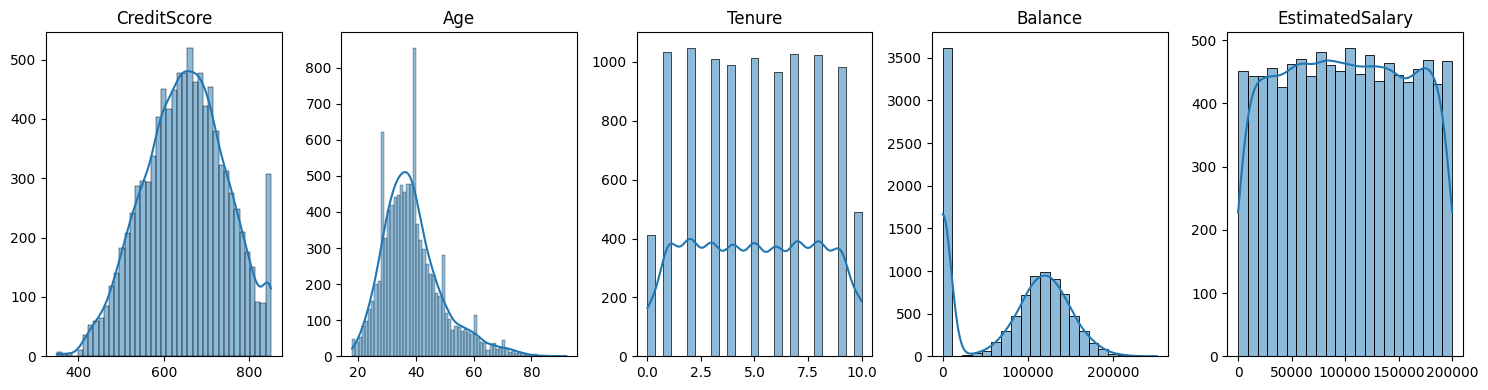

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(col_int), figsize=(15, 4))

for i, colonne in enumerate(col_int):
    sns.histplot(churn_data[colonne], ax=axes[i], kde=True)
    axes[i].set_title(colonne)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichez les histogrammes
plt.show()

## **Comme la statistique du test l'a indiquée aucune des variables n'est distribuée normalement.**

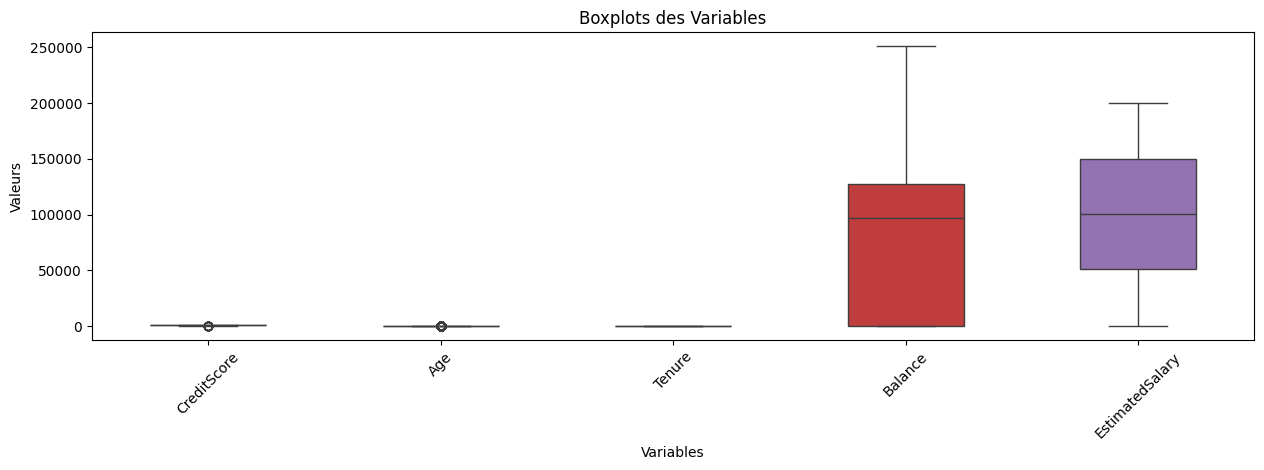

In [ ]:
plt.figure(figsize=(15, 4))

sns.boxplot(data=churn_data[col_int], width=0.5)

plt.xlabel('Variables')
plt.ylabel('Valeurs')
plt.xticks(rotation=45)
plt.title('Boxplots des Variables')

plt.show()

## **Les variables balance, tenure et EstimatedSalary n'ont pas de valeur atypique. Par ailleurs, on note la présence de valeur atypique dans la distribution des valeurs des variables creditscore et age.**

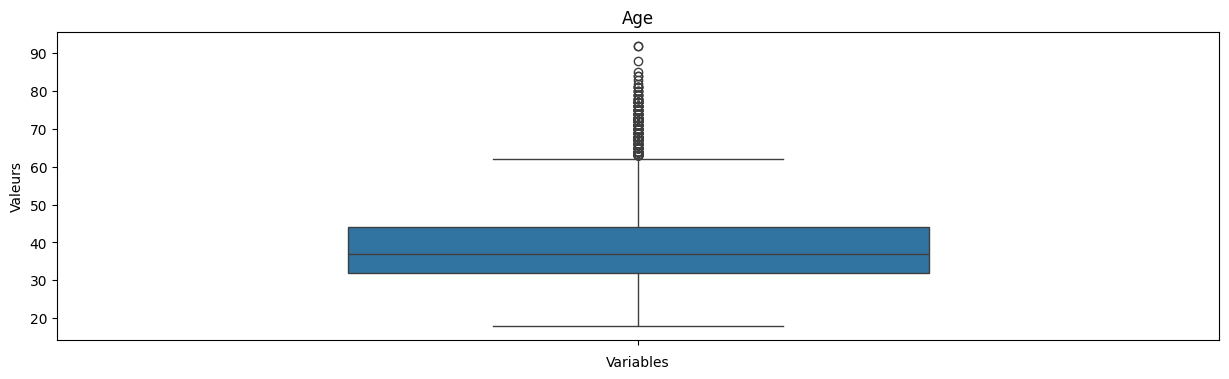

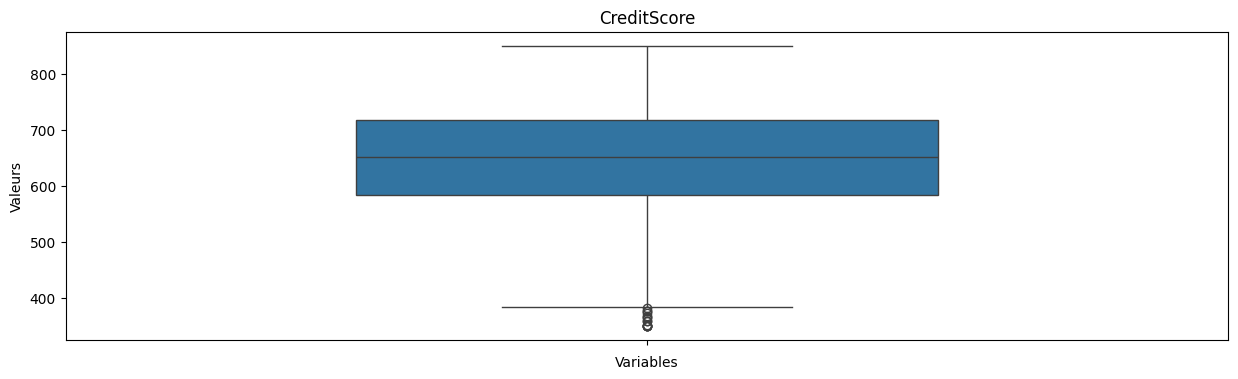

In [ ]:
features=['Age','CreditScore']

for futures in features :
     plt.figure(figsize=(15, 4))

     sns.boxplot(data=churn_data[futures], width=0.5)

     plt.xlabel('Variables')
     plt.ylabel('Valeurs')
     plt.xticks(rotation=45)
     plt.title(futures)

     plt.show()

In [ ]:
pd.crosstab(churn_data['Exited'], "freq", normalize=True)

col_0,freq
Exited,
0,0.7963
1,0.2037


# **Nous avons une base de données non équilibrée notamment les clients n'ayant pas quitter la banque sont surrepresentés de plus de quatre fois que ceux ayant quitter la banque. En effet, 71% des clients de la base de données n'ont pas quitter la banque ce qui représente un énorme déséquilibre dans les données.**

In [ ]:
t=pd.crosstab(churn_data['Exited'],"freq")
print(t)

col_0   freq
Exited      
0       7963
1       2037


<Axes: >

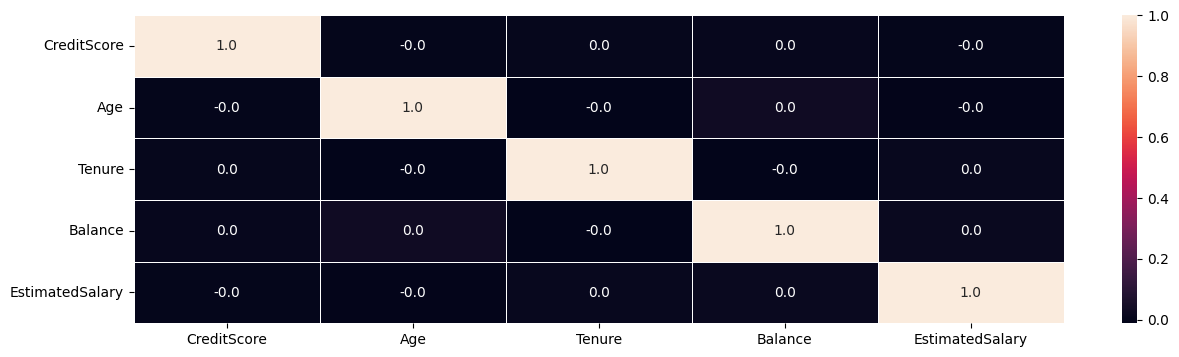

In [ ]:
#correlation mapcol_int
data=churn_data[col_int]
f,ax=plt.subplots(figsize=(15,4))
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

# **Toutes nos variables quantitatives sont non corrélées entre elles ce qui est plûtot bien. Maintenant nous allons tester la dépendance entre variables qualitatives et entre quantitatives et qualitatives.**

In [ ]:
churn_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [ ]:
matrice= pd.crosstab(churn_data['Gender'], churn_data['Geography'],rownames=["gender"],colnames=["geography"])
matrice

geography,France,Germany,Spain
gender,,,
Female,2261,1193,1089
Male,2753,1316,1388


In [ ]:
from scipy.stats import chi2_contingency as chi2_contingency

khi2, pval , ddl , contingent_theorique = chi2_contingency(matrice)
print( pval)

0.03145869671789379


La pvalue du test de khi2 étant inférieur au seuil de risque de 5% on conclut qu'il y un lien entre la région géographique et la sexe.

In [ ]:
matrice1= pd.crosstab(churn_data['NumOfProducts'], churn_data['HasCrCard'],rownames=["NumOfProducts"],colnames=["HasCrCard"])
khi2, pval , ddl , contingent_theorique = chi2_contingency(matrice1)
print( pval)

0.9450610918614076


La pvalue du test de khi2 étant supérieur au seuil de risque de 5% on conclut qu'il y a pas  un lien entre le NumofProducts et hasCrCard.

In [ ]:
matrice2= pd.crosstab(churn_data['IsActiveMember'], churn_data['HasCrCard'],rownames=["NumOfProducts"],colnames=["HasCrCard"])
khi2, pval , ddl , contingent_theorique = chi2_contingency(matrice2)
print( pval)

0.2441748368876971


La pvalue du test de khi2 étant supérieur au seuil de risque de 5% on conclut qu'il y a pas un lien entre le ISActiveMember et hasCrCard.

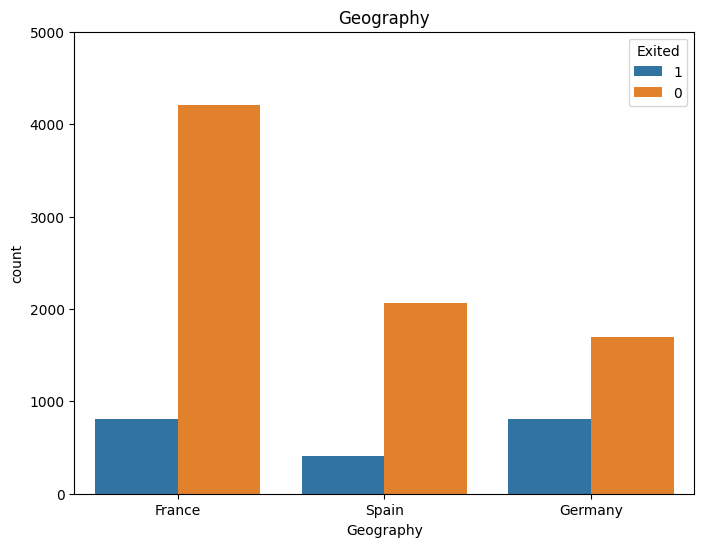

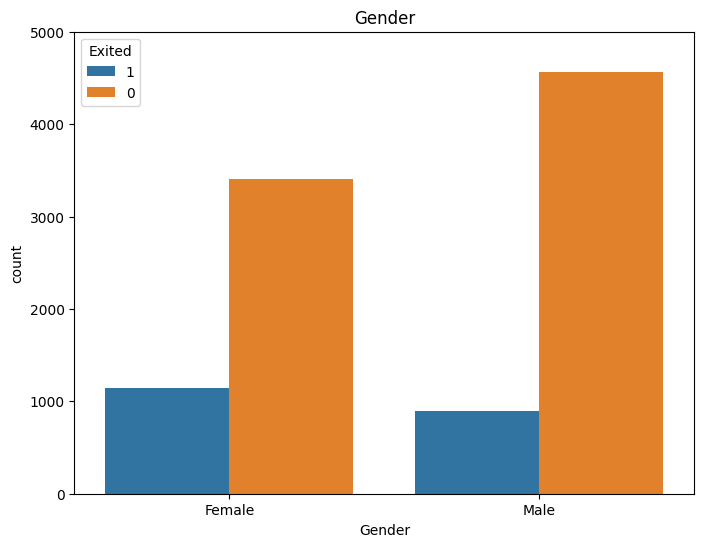

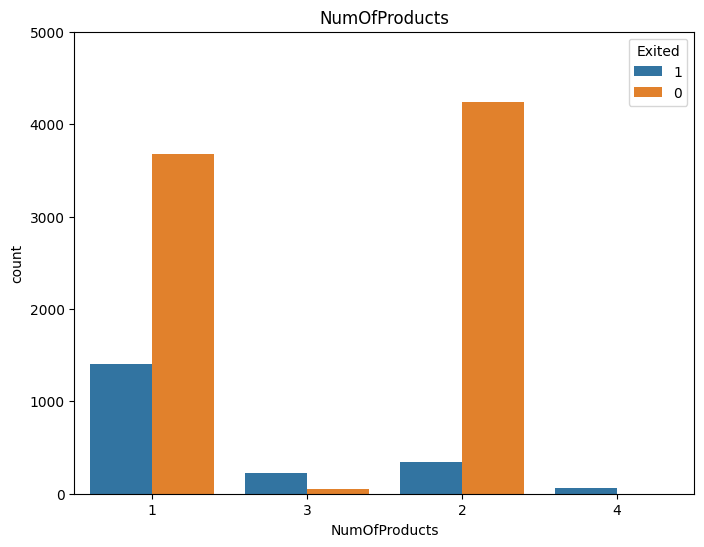

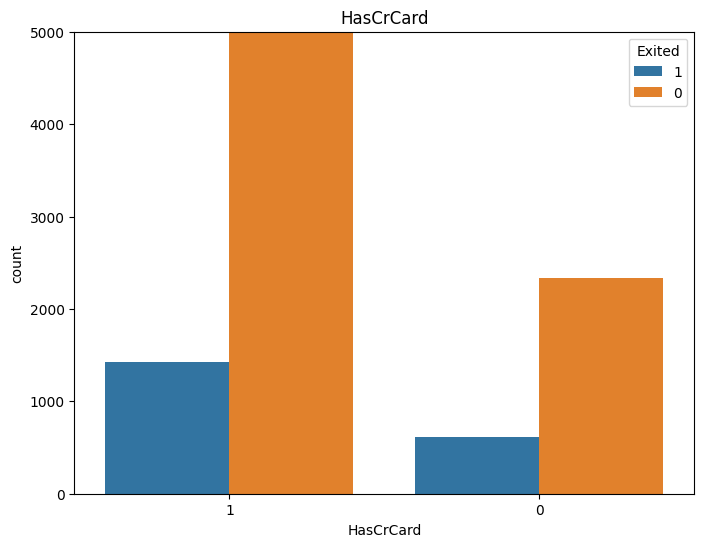

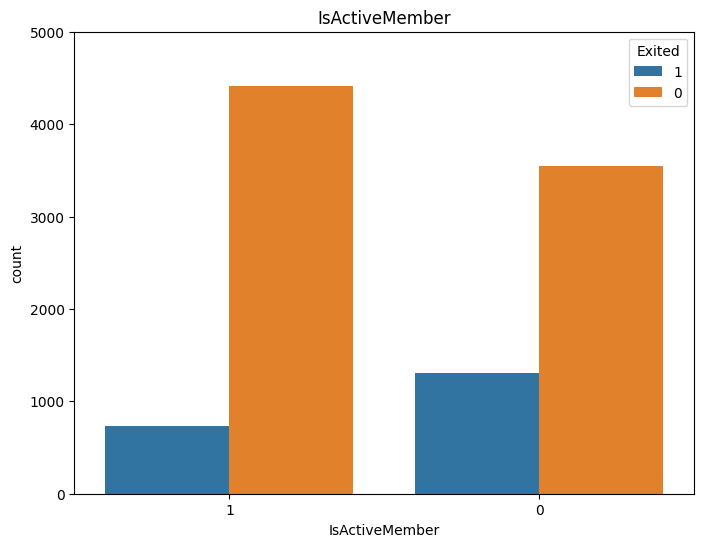

In [ ]:
list_of_cat_features = churn_data.select_dtypes(include=['object', 'category'])
list_of_cat_features= list_of_cat_features.drop('Exited',axis=1)
for feature in list_of_cat_features:
   boolfig, ax=plt.subplots(figsize=(8,6))
   sns.countplot(x=feature, data=churn_data, hue='Exited')
   ax.set_ylim(0,5000)
   plt.title( feature)


   plt.show()

## On remarque que la grande majorité des clients provient de France, mais la majorité des clients qui se désabonnent proviennent d'Allemagne. La part de clientes féminines qui se désabonne est également plus importante que celle des clients masculins. La plupart des clients ont 1 ou 2 produits et la plupart des clients qui ont abandonné ont 1 produit, peut-être qu'ils ne sont pas satisfaits, alors ils sont désabonnés.
### Il est intéressant de noter que la majorité des clients qui ont abandonné sont ceux qui possèdent une carte de crédit, mais cela peut être une coïncidence puisque la majorité des clients possèdent une carte de crédit.
### Sans surprise, les membres inactifs connaissent un taux de désabonnement plus important et la proportion globale de membres inactifs est également très élevée.

In [ ]:
churn_data.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
churn_data.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [ ]:
churn_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [ ]:
col_int

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'], dtype='object')

In [ ]:
# Recodage des variables catégorielles
churn_modelisation=churn_data.copy()
churn_modelisation['Geography']=churn_modelisation['Geography'].map({'France':0,'Germany':1,'Spain':2})
churn_modelisation['Gender']=churn_modelisation['Gender'].map({'Male':0,'Female':1})

In [ ]:
churn_modelisation

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,1,42,2,0.00,1,1,1,101348.88,1
2,608,2,1,41,1,83807.86,1,0,1,112542.58,0
3,502,0,1,42,8,159660.80,3,1,0,113931.57,1
4,699,0,1,39,1,0.00,2,0,0,93826.63,0
5,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,0,0,39,5,0.00,2,1,0,96270.64,0
9997,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9998,709,0,1,36,7,0.00,1,0,1,42085.58,1


In [ ]:
# Standardisation des variables continues
scaler = StandardScaler()
#scaled_continuous_variables = pd.DataFrame(scaler.fit_transform(continuous_variables), columns=continuous_variables.columns)
i = scaler.fit_transform(churn_modelisation[col_int])
scaled_base = pd.DataFrame(i, columns=col_int)
scaled_base['Gender']=churn_modelisation['Gender'].values
scaled_base['Geography']=churn_modelisation['Geography'].values
# Création de variable catégorielle pour le nombre de credit_lines
scaled_base["NumOfProducts"] = churn_modelisation["NumOfProducts"].values
scaled_base["NumOfProducts"] = churn_modelisation["NumOfProducts"].astype("category")
#var_categorie=['Geography','Gender']
scaled_base = pd.get_dummies(scaled_base)
scaled_base["Exited"] = churn_modelisation["Exited"].values

In [ ]:
scaled_base

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Gender,Geography,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Exited
0,-0.326221,0.293517,-1.041760,-1.225848,0.021886,1,0,0,0,0,0,1
1,-0.440036,0.198164,-1.387538,0.117350,0.216534,1,2,1,0,0,0,0
2,-1.536794,0.293517,1.032908,1.333053,0.240687,1,0,1,0,0,0,1
3,0.501521,0.007457,-1.387538,-1.225848,-0.108918,1,0,0,0,1,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.365276,1,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,-0.066419,0,0,0,1,0,0,0
9996,-1.391939,-0.373958,1.724464,-0.306379,0.027988,0,0,0,1,0,0,0
9997,0.604988,-0.278604,0.687130,-1.225848,-1.008643,1,0,1,0,0,0,1
9998,1.256835,0.293517,-0.695982,-0.022608,-0.125231,0,1,1,0,0,0,1


Nous avons appliqué la normalisation centré reduite pour éliminer l'éffet d'échelle et coder la variable nombre de produit que le client a dans la banque  en 5 variable indicatrices la dernière catégorie étant pris comme référence.

In [ ]:
X=scaled_base.drop('Exited',axis=1)
y=scaled_base['Exited']


In [ ]:
# Redressage l'échantillon train par oversampling
oversampler = SMOTE(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)


In [ ]:
table=pd.crosstab(y, "freq")
print(table)

col_0   freq
Exited      
0       7963
1       2037


In [ ]:
table1=pd.crosstab(y_resampled,"freq")
print(table1)

col_0   freq
Exited      
0       7963
1       7963


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled,test_size=0.2, random_state = 1) #80 % of train data, 20 % of test data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12740, 11), (3186, 11), (12740,), (3186,))

Modélisation en utilisant la méthode SMV

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.svm import SVC
# Définition du modèle SVC
c_svc = SVC(random_state=42)

#Tuning three kernels
params = [
    {"kernel": ["rbf"], "gamma": [0.01, 0.1,0.5,1,2], "C": [1, 10, 100, 1000]},
    {"kernel": ["poly"], "degree":[1,2,3,4],"C": [1, 10, 100, 1000]},
    {"kernel": ["linear"],"C": [1, 10, 100, 1000]}
]

# Recherche d'hyperparamètres avec GridSearchCV et validation croisée
grid_search = GridSearchCV(estimator=c_svc, param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.1, 0.5, 1, 2], 'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [1, 2, 3, 4],
                          'kernel': ['poly']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             scoring='accuracy')

In [ ]:
# Afficher les meilleurs paramètres
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Meilleurs paramètres :", best_params)# Meilleur paramètres
print("Meilleur score : ", best_score) # Meilleur score

Meilleurs paramètres : {'C': 10, 'gamma': 2, 'kernel': 'rbf'}
Meilleur score :  0.8659340659340659


In [ ]:
pd.DataFrame(grid_search.cv_results_
             ).sort_values(by='rank_test_score'
                           ).head(10) # Résultats de la recherche

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,11.546788,0.435710,1.005178,0.010564,10,2,rbf,NaN,"{'C': 10, 'gamma': 2, 'kernel': 'rbf'}",0.866954,0.863422,0.879906,0.854396,0.864992,0.865934,0.008205,1
14,11.367913,0.505087,1.094361,0.204931,100,2,rbf,NaN,"{'C': 100, 'gamma': 2, 'kernel': 'rbf'}",0.864600,0.861460,0.873234,0.850078,0.865777,0.863030,0.007541,2
19,10.812786,0.570745,1.157611,0.362808,1000,2,rbf,NaN,"{'C': 1000, 'gamma': 2, 'kernel': 'rbf'}",0.863815,0.861068,0.873234,0.849686,0.866170,0.862794,0.007697,3
4,7.432402,0.682131,1.594956,0.502813,1,2,rbf,NaN,"{'C': 1, 'gamma': 2, 'kernel': 'rbf'}",0.857143,0.853611,0.864600,0.843014,0.854788,0.854631,0.006953,4
8,7.169819,0.467013,0.912226,0.279914,10,1,rbf,NaN,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.846546,0.848509,0.868132,0.841837,0.844192,0.849843,0.009415,5
13,8.576830,0.495910,0.690345,0.011233,100,1,rbf,NaN,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.838305,0.844976,0.854788,0.838697,0.844192,0.844192,0.005962,6
18,8.861848,0.429115,0.875045,0.251997,1000,1,rbf,NaN,"{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}",0.832810,0.842622,0.853611,0.835165,0.844584,0.841758,0.007386,7
12,16.568344,0.641708,0.765803,0.220012,100,0.5,rbf,NaN,"{'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}",0.827708,0.834380,0.845369,0.821429,0.824568,0.830691,0.008500,8
17,29.256086,2.038066,0.583334,0.099969,1000,0.5,rbf,NaN,"{'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}",0.810440,0.824176,0.835557,0.812009,0.826138,0.821664,0.009365,9
3,6.253815,0.442623,1.057504,0.080108,1,1,rbf,NaN,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.823783,0.812402,0.825353,0.807692,0.826923,0.819231,0.007709,10


In [ ]:
# Création du meilleur modèle avec les paramètres trouvés
best_svm_model = SVC(random_state=42, C=10, kernel='rbf', gamma = 2)

In [ ]:
# Entraînement du modèle sur l'échantillon d'entraînement
best_svm_model.fit(X_train, y_train)

SVC(C=10, gamma=2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score,\
    confusion_matrix, classification_report,ConfusionMatrixDisplay
#création d'une fonction d'évaluation

def evaluate_model(model, X_test, y_test):
    # On prédit les valeurs de la variable cible pour les données de test
    y_pred = model.predict(X_test)

    # On calcule l'accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %.2f' % accuracy)

    # On calcule la matrice de confusion
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

    # On calcule le rapport de classification

    report = classification_report(y_test, y_pred)
    print(report)
    return None

Précision sur l'échantillon d'entraînement : 0.9968602825745683
Précision sur l'échantillon de test : 0.8854362837413685
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6429
           1       0.99      1.00      1.00      6311

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740



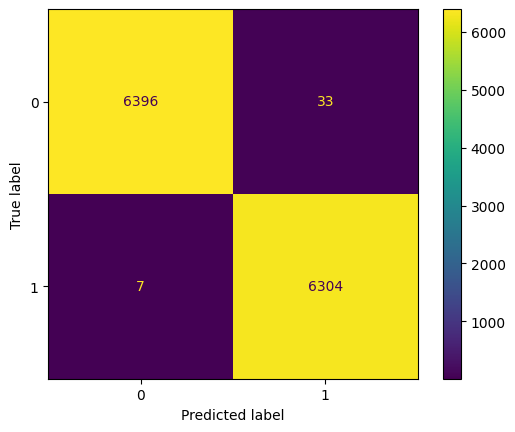

In [ ]:
# Prédiction sur l'échantillon d'entraînement et de test
y_train_pred = best_svm_model.predict(X_train)
y_test_pred = best_svm_model.predict(X_test)

# Évaluation de la précision du modèle
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Précision sur l'échantillon d'entraînement :", train_accuracy)
print("Précision sur l'échantillon de test :", test_accuracy)

print("==="*25)
evaluate_model(best_svm_model,X_train,y_train)

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.91      0.84      0.88      1534
           1       0.86      0.92      0.89      1652

    accuracy                           0.89      3186
   macro avg       0.89      0.88      0.88      3186
weighted avg       0.89      0.89      0.89      3186



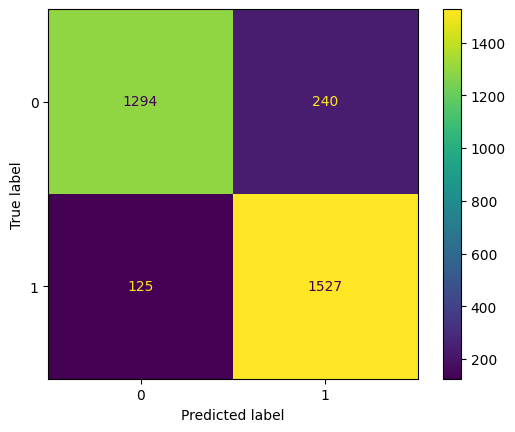

In [ ]:
evaluate_model(best_svm_model,X_test,y_test)

### Le problème étant de modéliser le phénomène de churn dans la banque nous allons donc utilser le rappel qui permet de mesure de combien vraiment les résultats pertinents( le churn) sont retournés.
### Nous pouvons remarquer que, les clients qui se désabonne sont detectés à 92%. Sachant qu'en même les metrics sur les données d'entrainnement et de test sont presques similaires donc nous pouvons affirmer qu'on ne fait pas face à un overfitting et que la méthode de rééquilibrage des données est éfficace pour ce modèle.

In [ ]:
from sklearn.inspection import permutation_importance

# Calcul de l'importance des caractéristiques par permutation
perm_importance = permutation_importance(best_svm_model, X_test, y_test, n_repeats=30, random_state=42)

In [ ]:
def plot_feature_imp(feature_importances_):

    importances = feature_importances_

    # Get feature names (assuming you have them)
    feature_names = [f"{i}" for i in X_train.columns]  # Replace with your feature names

    # Sort feature importances and feature names together
    sorted_indices = np.argsort(importances)[::-1]
    sorted_importances = importances[sorted_indices]
    sorted_feature_names = [feature_names[i] for i in sorted_indices]

    # Plot sorted feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(X_train.shape[1]), sorted_importances, align='center')
    plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature Importance ratio')
    plt.tight_layout()
    plt.show()

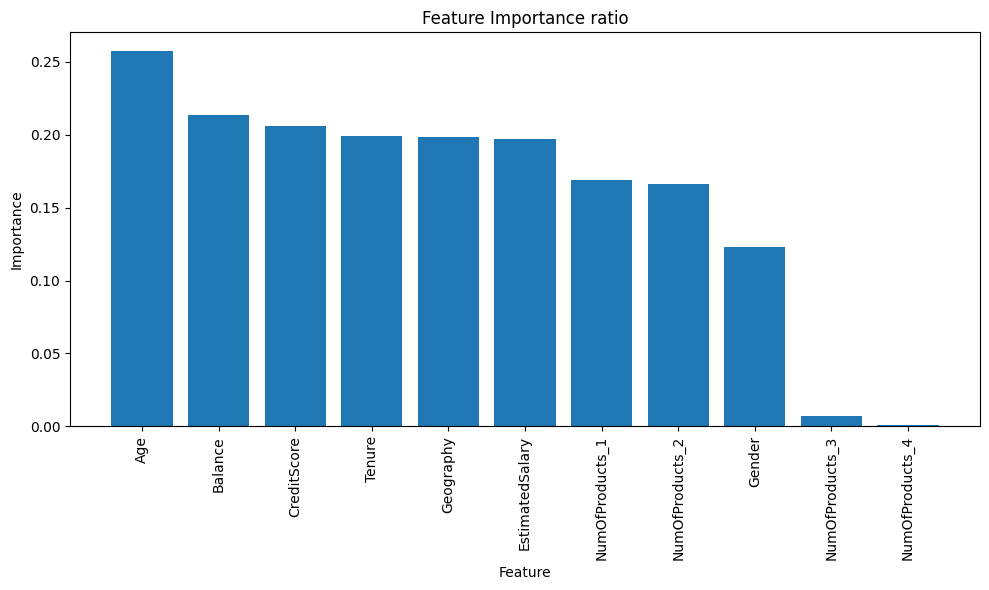

In [ ]:
plot_feature_imp(perm_importance.importances_mean)

### Cette figure de classer les variables selon leur imporatance dans la classification. Les 5 variables les plus importantes pour ce modèle sont : AGE , Balance , CrediScore, Tenure et  Greography.

Modèle :Linéaire SVM

In [ ]:
from sklearn.svm import LinearSVC
LinearSVC().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
#Linear SVM
from sklearn.svm import LinearSVC
# Définition des hyperparamètres à tester
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}

# Créer le modèle de régression logistique
l_SVC = LinearSVC(random_state=42)

# Recherche d'hyperparamètres avec GridSearchCV et validation croisée
grid_search_l_SVC = GridSearchCV(estimator=l_SVC, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_l_SVC.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
# Afficher les meilleurs paramètres
best_params = grid_search_l_SVC.best_params_
best_score = grid_search_l_SVC.best_score_
print("Meilleurs paramètres :", best_params)# Meilleur paramètres
print("Meilleur score : ", best_score) # Meilleur score

Meilleurs paramètres : {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
Meilleur score :  0.7018053375196232


In [ ]:
# Création du meilleur modèle avec les paramètres trouvés
best_l_SVC_model = LinearSVC(random_state=42, C=1, max_iter = 100, penalty = 'l2')
best_l_SVC_model.fit(X_train, y_train)

LinearSVC(C=1, max_iter=100, random_state=42)

In [ ]:
# Prédiction sur l'échantillon d'entraînement et de test
y_train_pred = best_l_SVC_model .predict(X_train)
y_test_pred = best_l_SVC_model.predict(X_test)

# Évaluation de la précision du modèle
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Précision sur l'échantillon d'entraînement :", train_accuracy)
print("Précision sur l'échantillon de test :", test_accuracy)

Précision sur l'échantillon d'entraînement : 0.7006279434850864
Précision sur l'échantillon de test : 0.7033898305084746


Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.67      0.74      0.71      1534
           1       0.74      0.67      0.70      1652

    accuracy                           0.70      3186
   macro avg       0.71      0.70      0.70      3186
weighted avg       0.71      0.70      0.70      3186



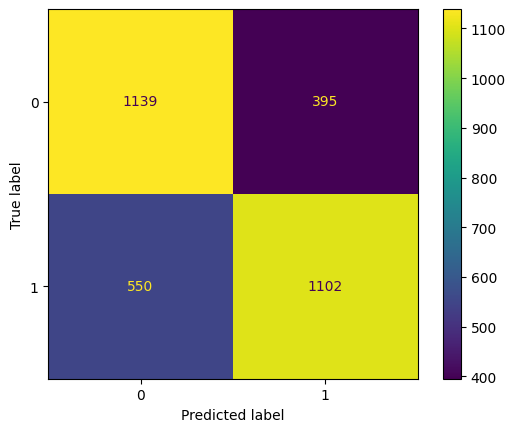

In [ ]:
##Evaluation du modèle
evaluate_model(best_l_SVC_model, X_test, y_test)

### Nous pouvons remarquer que, les clients qui se désabonne sont detectés à 67%. Sachant qu'en même les métrics sur les données d'entrainnement et de test sont similaires donc nous pouvons affirmer qu'on ne fait pas face à un overfitting et que la méthode de rééquilibrage des données est éfficace pour ce modèle.

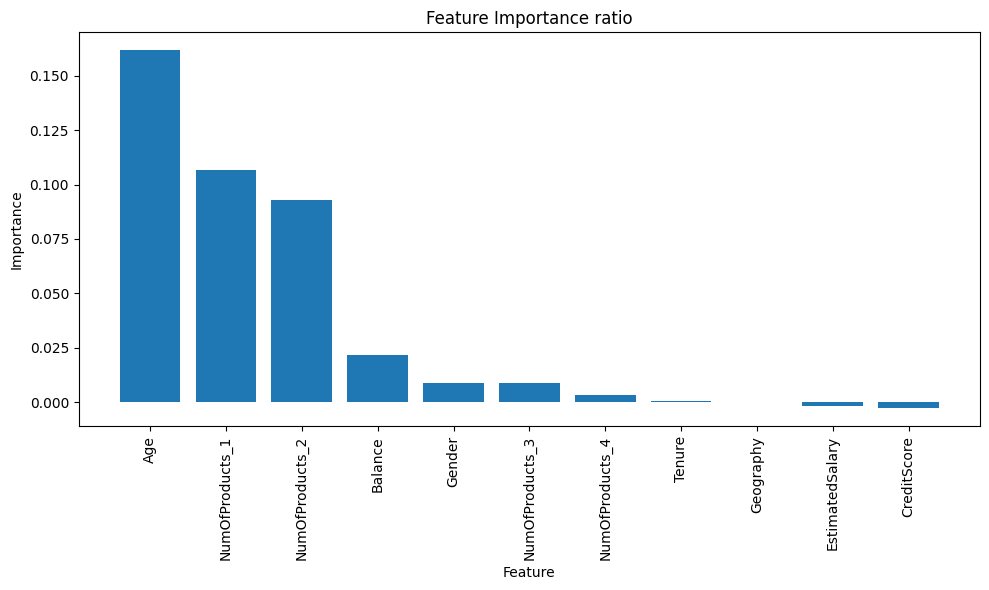

In [ ]:
from sklearn.inspection import permutation_importance

# Calcul de l'importance des caractéristiques par permutation
perm_importance_lSVC = permutation_importance(best_l_SVC_model, X_test, y_test, n_repeats=30, random_state=42)
plot_feature_imp(perm_importance_lSVC.importances_mean)

Modèle : SGD classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
SGDClassifier().get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#SGD classifier
from sklearn.linear_model import SGDClassifier
# Définition des hyperparamètres à tester
param_grid = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty" : ["l2", "l1"],
    'max_iter': [100,500,1000]
}

# Créer le modèle de régression logistique
sgdc_svm = SGDClassifier(random_state=42)

# Recherche d'hyperparamètres avec GridSearchCV et validation croisée
grid_search_sgdc_svm = GridSearchCV(estimator=sgdc_svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_sgdc_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'loss': ['hinge', 'log', 'squared_hinge',
                                  'modified_huber'],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l2', 'l1']},
             scoring='accuracy')

In [ ]:
# Afficher les meilleurs paramètres
best_params = grid_search_sgdc_svm.best_params_
best_score = grid_search_sgdc_svm.best_score_
print("Meilleurs paramètres :", best_params)# Meilleur paramètres
print("Meilleur score : ", best_score) # Meilleur score

Meilleurs paramètres : {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l1'}
Meilleur score :  0.7029827315541601


In [ ]:
# Création du meilleur modèle avec les paramètres trouvés et entrainnement du modèle
best_sgdc_svm_model = SGDClassifier(random_state=42, loss='hinge', max_iter = 100, penalty = 'l1')
best_sgdc_svm_model.fit(X_train, y_train)

SGDClassifier(max_iter=100, penalty='l1', random_state=42)

Précision sur l'échantillon d'entraînement : 0.7057299843014129
Précision sur l'échantillon de test : 0.7049591964846202
Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1534
           1       0.73      0.69      0.71      1652

    accuracy                           0.70      3186
   macro avg       0.71      0.71      0.70      3186
weighted avg       0.71      0.70      0.71      3186



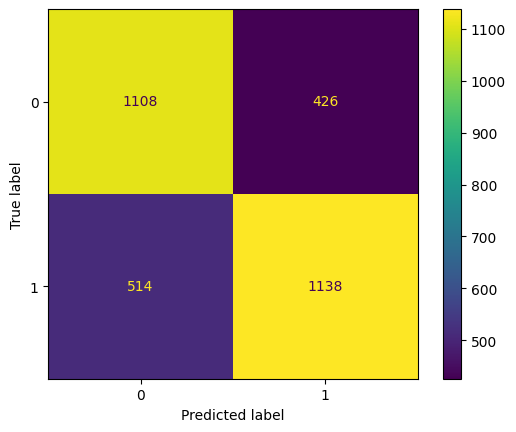

In [ ]:
# Prédiction sur l'échantillon d'entraînement et de test
y_train_pred = best_sgdc_svm_model.predict(X_train)
y_test_pred = best_sgdc_svm_model.predict(X_test)

# Évaluation de la précision du modèle
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Précision sur l'échantillon d'entraînement :", train_accuracy)
print("Précision sur l'échantillon de test :", test_accuracy)
evaluate_model(best_sgdc_svm_model, X_test, y_test)

### Nous pouvons remarquer que, les clients qui se désabonne sont detectés à 69%. Sachant qu'en même que les métrics sur les données d'entrainnement et de test sont presques similaires donc nous pouvons affirmer qu'on ne fait pas face à un overfitting et que la méthode de rééquilibrage des données est éfficace pour ce modèle.

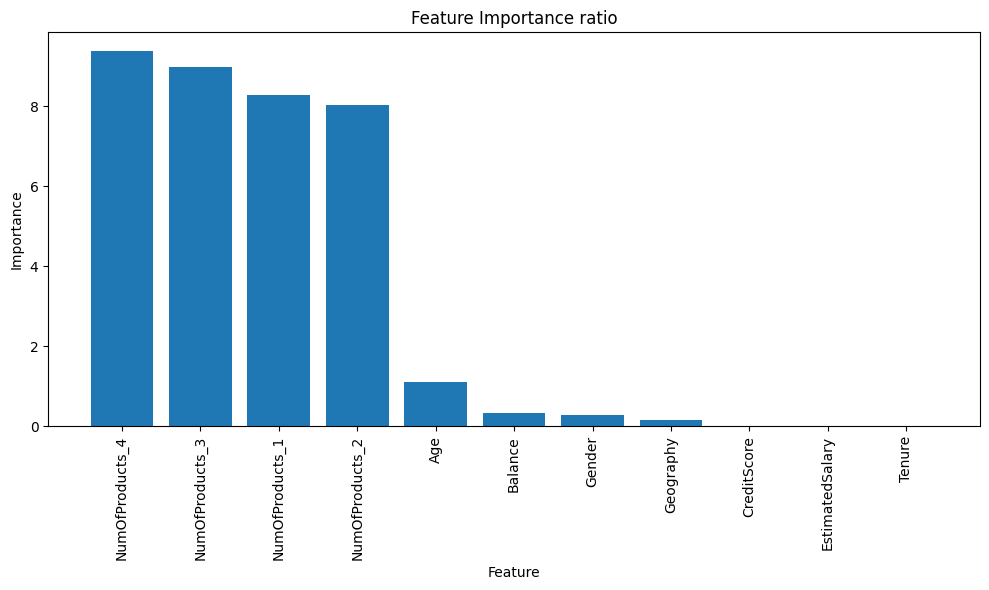

In [ ]:
# Afficher un graphique de l'importance des paramètres
feature_importance = np.abs(best_sgdc_svm_model.coef_[0])

plot_feature_imp(feature_importance)

Logistique regression

In [ ]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.linear_model import LogisticRegression
# Définition des hyperparamètres à tester
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}

# Créer le modèle de régression logistique
logreg = LogisticRegression(random_state=42)

# Recherche d'hyperparamètres avec GridSearchCV et validation croisée
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
# Afficher les meilleurs paramètres
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Meilleurs paramètres :", best_params)# Meilleur paramètres
print("Meilleur score : ", best_score) # Meilleur score

Meilleurs paramètres : {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
Meilleur score :  0.701883830455259


In [ ]:
# Création du meilleur modèle avec les paramètres trouvés
best_logreg_model = LogisticRegression(random_state=42, C=1, max_iter = 100, penalty = 'l2')

In [ ]:
# Entraînement du modèle sur l'échantillon d'entraînement
best_logreg_model.fit(X_train, y_train)

LogisticRegression(C=1, random_state=42)

In [ ]:
# Prédiction sur l'échantillon d'entraînement et de test
y_train_pred = best_logreg_model.predict(X_train)
y_test_pred = best_logreg_model.predict(X_test)

# Évaluation de la précision du modèle
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Précision sur l'échantillon d'entraînement :", train_accuracy)
print("Précision sur l'échantillon de test :", test_accuracy)

Précision sur l'échantillon d'entraînement : 0.701098901098901
Précision sur l'échantillon de test : 0.7062146892655368


Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1534
           1       0.74      0.68      0.71      1652

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186



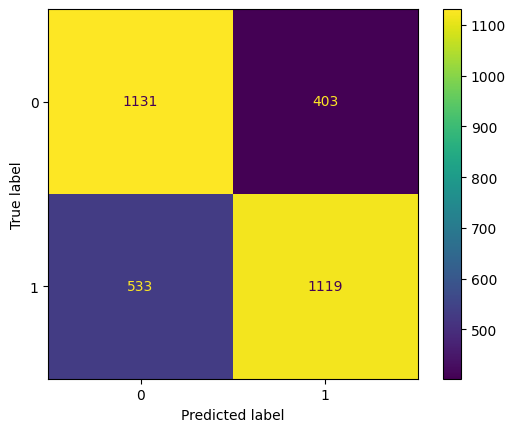

In [ ]:
evaluate_model(best_logreg_model, X_test, y_test)

### Nous pouvons remarquer que, les clients qui se désabonne sont détectés à 68%. Sachant qu'en même les metrics sur les données d'entrainnement et de test sont similaires donc nous pouvons affirmer qu'on ne fait pas face à un overfitting et que la methode de reéquilibrage des données est éfficace pour ce modèle.

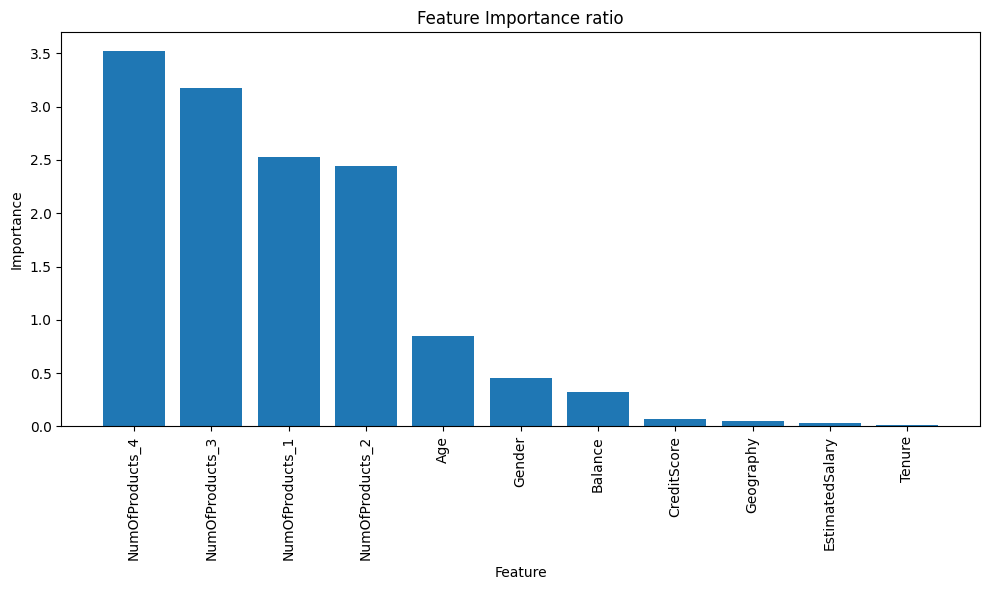

In [ ]:
# Afficher un graphique de l'importance des paramètres
feature_importance = np.abs(best_logreg_model.coef_[0])

plot_feature_imp(feature_importance)

In [ ]:
y_test

307      0
13938    1
15223    1
3964     1
15352    1
        ..
12336    1
13709    1
14384    1
7694     0
11165    1
Name: Exited, Length: 3186, dtype: object

commparaisons des modèles

In [ ]:
y_test

307      0
13938    1
15223    1
3964     1
15352    1
        ..
12336    1
13709    1
14384    1
7694     0
11165    1
Name: Exited, Length: 3186, dtype: object

In [ ]:
y_test_pred

array(['0', '1', '1', ..., '1', '0', '1'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Renommage des modèles
SGDClassifier_model = best_sgdc_svm_model
lineare_SVM = best_l_SVC_model
SVM = best_svm_model
Logistic_Regression = best_logreg_model

#liste de modèles
models = [SVM,lineare_SVM,SGDClassifier_model, Logistic_Regression]

# Initialisation d'un DataFrame pour stocker les résultats
results_df = pd.DataFrame(columns=['Modèle', 'Précision (Train)', 'Précision (Test)', 'Rappel (Test)', 'F1-score (Test)'])

# Entraîner et évaluer chaque modèle
for model in models:
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_name = type(model).__name__
    precision_train = accuracy_score(y_train, y_train_pred)
    precision_test = accuracy_score(y_test, y_test_pred)
    rappel_test = recall_score(y_test, y_test_pred,pos_label='1')
    f1_test = f1_score(y_test, y_test_pred,pos_label='1')

    results_df = results_df.append({
        'Modèle': model_name,
        'Précision (Train)': precision_train,
        'Précision (Test)': precision_test,
        'Rappel (Test)': rappel_test,
        'F1-score (Test)': f1_test
    }, ignore_index=True)

# Afficher les résultats
results_df

,Modèle,Précision (Train),Précision (Test),Rappel (Test),F1-score (Test)
0,SVC,0.996860,0.885436,0.924334,0.893244
1,LinearSVC,0.700628,0.703390,0.667070,0.699905
2,SGDClassifier,0.705730,0.704959,0.688862,0.707711
3,LogisticRegression,0.701099,0.706215,0.677361,0.705104


### Nous avons mis quatres modèle svm pour la modélisation du phénomène de churn dans la banque. Pour le choix du meileur modèle nous allons nous baser sur le duo Précision- Rappel. En effet, Precision-Recall est une mesure utile du succès de la prédiction lorsque les classes sont très déséquilibrées. Dans la recherche d'informations, la précision est une mesure de la pertinence des résultats, tandis que le rappel est une mesure de combien vraiment les résultats pertinents sont retournés.Un score élevé pour les deux montrent que le classificateur( modèle) revoit des résulats précis( haute précision ), ainsi que le retour d'une majorité de tous les résultats positifs ( rappel élevé ).

# ***Ainsi, notre meilleur modèle parmis l'ensemble des modèles implémentés est le SVC avec une précision de 88.54% et rappel de 92%.***

# ***Churn Modelling : Building ANN***

In [ ]:
churn_modelisation

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,1,42,2,0.00,1,1,1,101348.88,1
2,608,2,1,41,1,83807.86,1,0,1,112542.58,0
3,502,0,1,42,8,159660.80,3,1,0,113931.57,1
4,699,0,1,39,1,0.00,2,0,0,93826.63,0
5,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,0,0,39,5,0.00,2,1,0,96270.64,0
9997,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9998,709,0,1,36,7,0.00,1,0,1,42085.58,1


In [ ]:
from tensorflow.keras.utils import to_categorical

X_ANN = churn_modelisation.drop('Exited', axis = 1)
y_ANN = to_categorical(churn_modelisation.Exited)

In [ ]:
#splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_trainANN, X_testANN, y_trainANN, y_testANN = train_test_split(X_ANN, y_ANN, test_size = 0.25)

In [ ]:
# Scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_trainANN = sc.fit_transform(X_trainANN)
X_testANN = sc.transform(X_testANN)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [ ]:
# initializing ann
model = Sequential()

# adding the first input layer and the first hidden layer
model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (10, )))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())
# adding the third hidden layer
model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the output layer
model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
import tensorflow as tf

train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))

model_history=model.fit(train_data, epochs=10, validation_data=valid_data)

In [ ]:
# fitting the model to the training set
model_history= model.fit(X_trainANN, y_trainANN, validation_split = 0.20, validation_data = (X_testANN, y_testANN), epochs = 100)

Epoch 1/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3604 - accuracy: 0.8491 - val_loss: 0.3467 - val_accuracy: 0.8580
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3537 - accuracy: 0.8512 - val_loss: 0.3513 - val_accuracy: 0.8572
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3585 - accuracy: 0.8504 - val_loss: 0.3449 - val_accuracy: 0.8616
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3586 - accuracy: 0.8499 - val_loss: 0.3490 - val_accuracy: 0.8580
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3551 - accuracy: 0.8532 - val_loss: 0.3493 - val_accuracy: 0.8564
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3549 - accuracy: 0.8549 - val_loss: 0.3468 - val_accuracy: 0.8608
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3539 - accuracy: 0.8540 - val_loss: 0.3491 - val_accuracy: 0.8600

In [ ]:
acc = model.evaluate(X_testANN, y_testANN)[1]

print(f'Accuracy of model is {acc}')

79/79 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.8580
Accuracy of model is 0.8579999804496765


In [ ]:
model.summary()

Model: "sequential_171"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_509 (Dense)           (None, 10)                110       
                                                                 
 dropout_10 (Dropout)        (None, 10)                0         
                                                                 
 batch_normalization_10 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_510 (Dense)           (None, 7)                 77        
                                                                 
 dropout_11 (Dropout)        (None, 7)                 0         
                                                                 
 batch_normalization_11 (Bat  (None, 7)                28        
 chNormalization)                                   

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_testANN)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = model.evaluate(X_testANN, y_testANN,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

79/79 [==============================] - 1s 11ms/step
********************
250/250 [==============================] - 1s 3ms/step - loss: 0.3494 - accuracy: 0.8612
Test score: 0.3493705987930298
Test accuracy: 0.8611999750137329


### La précision de notre modèle implémenté est de 86.11%

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_testANN,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1992
           1       0.81      0.42      0.55       508

   micro avg       0.86      0.86      0.86      2500
   macro avg       0.84      0.70      0.73      2500
weighted avg       0.86      0.86      0.84      2500
 samples avg       0.86      0.86      0.86      2500



### Nous pouvons remarquer que, les clients qui se désabonnent, sont detectés à 42% ce qui est plus faible par rapport au méthode SVM.

In [ ]:
pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 29.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully un

In [ ]:
y_trainANN.shape
X_trainANN.shape

(7500, 10)

grid search Methode

In [ ]:
# Tuning the ANN
# adding the first input layer and the first hidden layer
#model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (10, )))

# adding batch normalization and dropout layer
#model.add(Dropout(rate = 0.1))
#model.add(BatchNormalization())
# adding the third hidden layer
#model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

# adding batch normalization and dropout layer
#model.add(Dropout(rate = 0.1))
#model.add(BatchNormalization())

# adding the output layer
#model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
#model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_shape = (10, )))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

   # model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 200],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_trainANN, y_trainANN,verbose = 0)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

24/24 [==============================] - 0s 1ms/step


In [ ]:
print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

Best Parameters after tuning: {'batch_size': 25, 'epochs': 100, 'optimizer': 'adam'}
Best Accuracy after tuning: nan
